# Module imports


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string

# Functions


In [ ]:
def prepend_date(filename):
    today = pd.Timestamp.today().strftime('%Y-%m-%d')
    return today + '_' + filename

# TASKS:
1. Are there 'no data found' or non-printable or non-ASCI characters in the loaded dataframe?
2. How to trim string entries to <92 characters?
3. How to look up data from csv/excel file and merge them into dataframe? (for Header file and PHI-species file)
4. How to report data for certain years or releases? Can you visually display that and how?





# Code

In [ ]:
#Read complete data sets:  phiSlim: the complete data set with 30 columns
url = 'https://raw.githubusercontent.com/martin2urban/phi4statsPy/main/phiSlim30cols.csv'

phiSlim = pd.read_csv(
    url,
    header=0,
    skiprows=[1],
)
phiSlim.to_csv(('phiSlim.csv'), index=False)


In [ ]:
# Make subset of phiSlim dataset for training
column_names= ['PhiAcc', 'ProtId', 'PathSpecies', 'PathSpeciesTaxID', 'Phenotype', 'Literature_Id', 'Year_published', 'HostSpeciesTaxId']

cols = phiSlim[column_names].copy()
cols




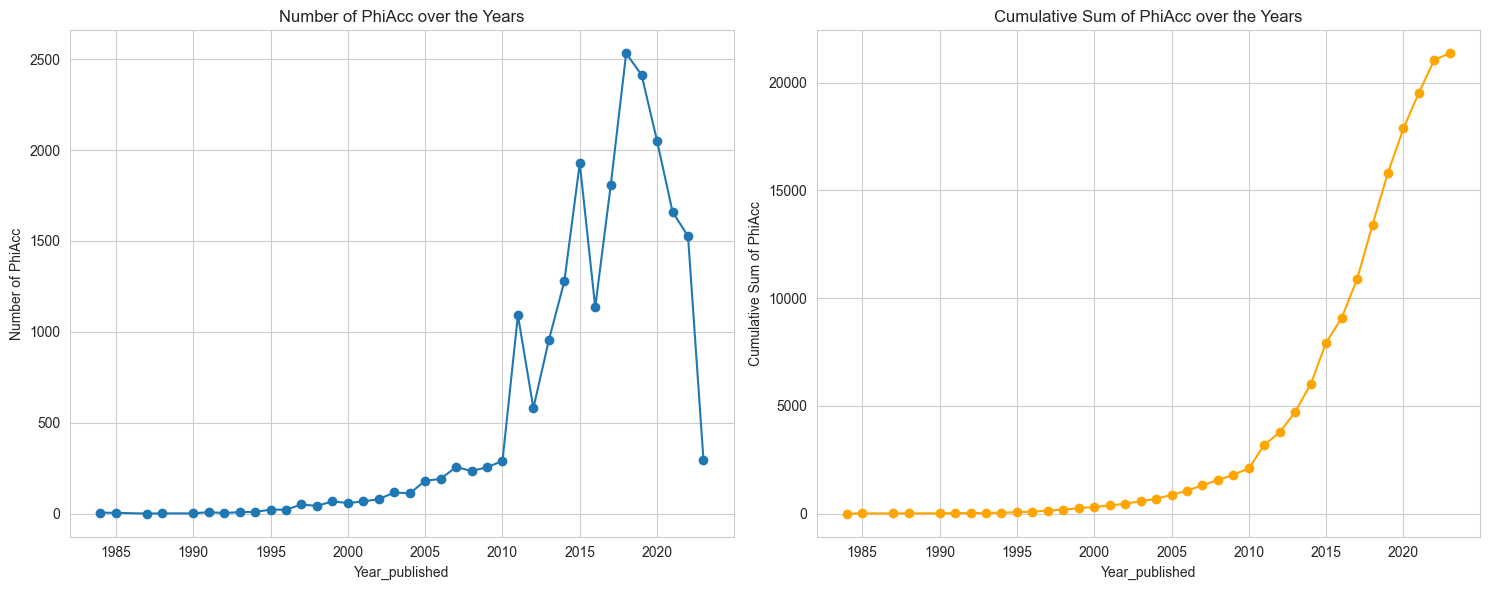

In [16]:
phiSlim.columns

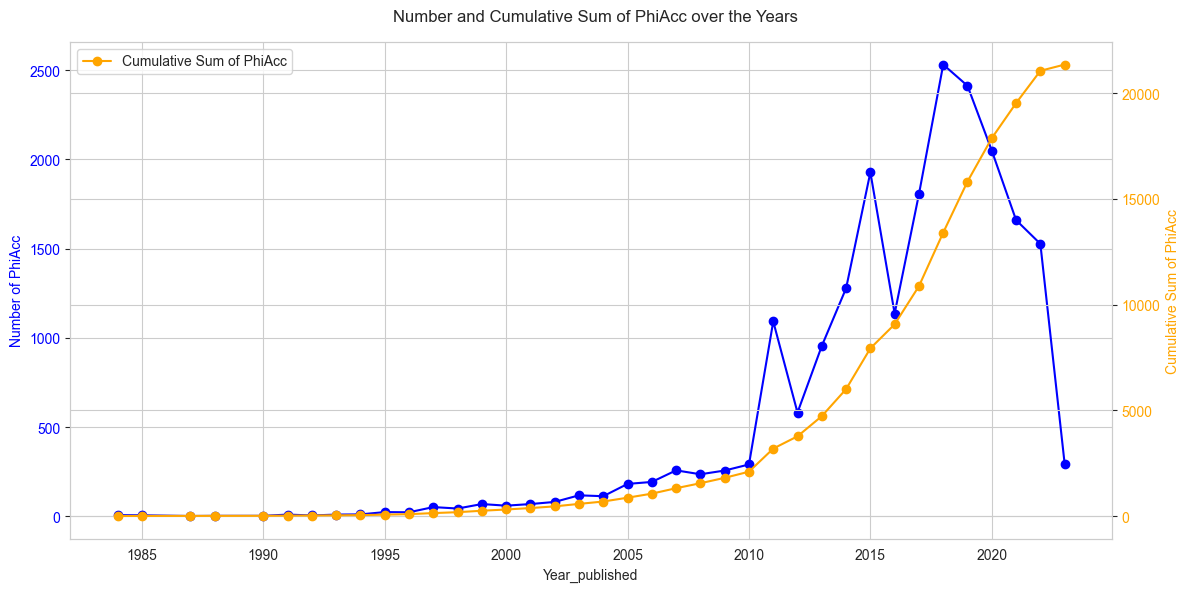

In [17]:
my_types = {
    "PhiAcc": str,
    "ProtId": str,
    "PathSpecies": str,
    "PathSpeciesTaxID": 'Int64',
}

phi2 = pd.read_csv(
    "4cols.csv",
    dtype=my_types,
    header=0
)
print(phi2.columns)
phi2.describe(include='all')
phi2.info()

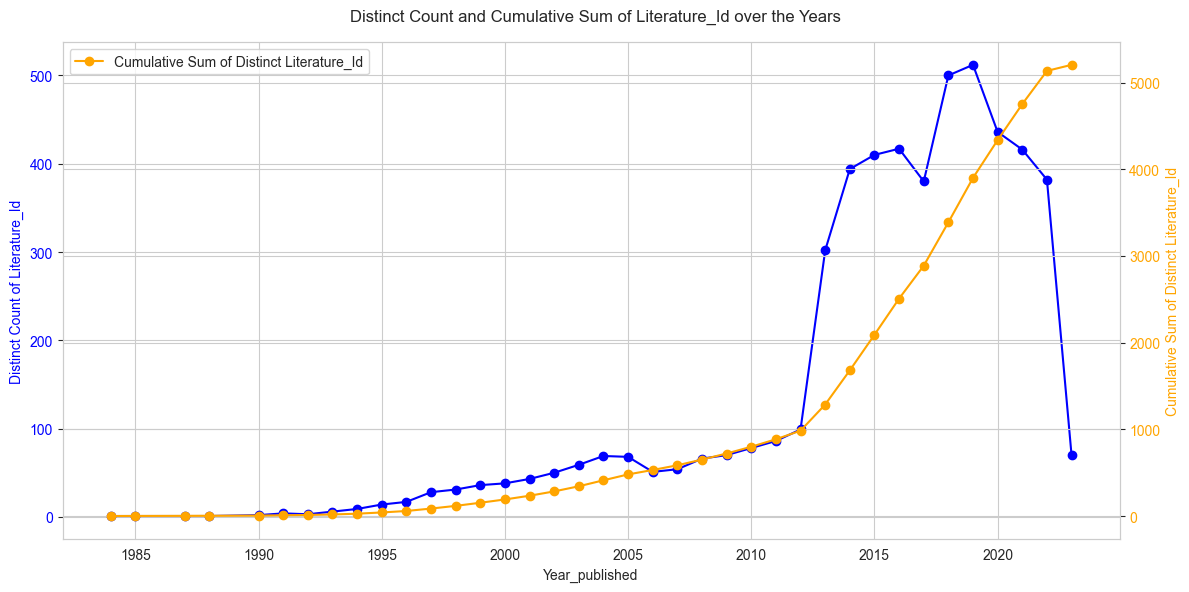

In [15]:
#How do I convert the columns 'PhiAcc', 'ProtId', 'PathSpecies', 'PathSpeciesTaxID' to strings?
#
columns = ['PhiAcc', 'ProtId', 'PathSpecies', 'PathSpeciesTaxID']
non_string_values_per_column = {}
for column in phi2.columns:
    non_string_values = set(phi2[column].astype(str).str.findall(r'[^a-zA-Z\s\d:]').sum())
    non_string_values_per_column[column] = non_string_values

for column, non_string_values in non_string_values_per_column.items():
    print(f"Non-string values in column '{column}':")
    for value in non_string_values:
        print(value)
    print()




In [ ]:
#STOP


In [ ]:
# SNIPPETS
columns= ['PhiAcc', 'ProtId', 'PathSpecies', 'PathSpeciesTaxID', 'Phenotype']
#phi[columns] = phi[columns].apply(lambda x: x.str.strip())
phi.to_csv(prepend_date('4cols.csv'), '4cols.csv', index=False)

In [ ]:
# make stats-counts report
# tabulate tally: specis x genes x interactions
# Group by 'PathSpecies' and calculate distinct 'PhiAcc' count and count of rows
data = phiSlim.groupby('PathSpecies').agg({'PhiAcc': 'nunique', 'PathSpecies': 'size'}).rename(columns={'PhiAcc': 'genes', 'PathSpecies': 'PHI.base.accession'}).reset_index()

# Sort the DataFrame by 'PHI.base.accession' in descending order
data = data.sort_values('PHI.base.accession', ascending=False)

# Rename 'PHI.base.accession' column to 'interactions'
data = data.rename(columns={'PHI.base.accession': 'interactions'})

# Write the DataFrame to a CSV file
data.to_csv(pd.Timestamp.today().strftime('%Y-%m-%d') +"phiSlim_speciesBYpathogen_geneBYinteraction_tally.csv", index=False, na_rep="")


In [ ]:
data.info()

In [ ]:
# tabulate tally: genus x genes x interactions
# Split data "species name
data2 = data['PathSpecies'].str.split(' ', expand=True).rename(columns={0: 'genus', 1: 'species'})
data2 = data2.iloc[:, [0, 1]]
# Group by genus and count distinct species
data3 = data2.groupby('genus').agg(Species=('species', 'nunique')).reset_index()
# Sort by descending species count
data3 = data3.sort_values('Species', ascending=False)
# Write to CSV
data3.to_csv(pd.Timestamp.today().strftime('%Y-%m-%d') +'_phiSlim_genus_no_Species.csv', index=False)

In [ ]:
data3


In [ ]:
columns = ['PhiAcc', 'PathSpecies', 'ProtId', 'HostSpeciesTaxId', 'Literature_Id', 'DiseaseName']
aggregations = {'PhiAcc': 'count', 'PathSpecies': 'nunique', 'ProtId': 'nunique', 'HostSpeciesTaxId': 'nunique', 'Literature_Id': 'nunique', 'DiseaseName': 'nunique'}

global_data = phiSlim[columns].agg(aggregations).reset_index()



In [ ]:
global_data.describe()

In [ ]:
phiSlim['DiseaseName'].nunique()
phiSlim['Phenotype'].nunique()
phiSlim['Phenotype'].astype('category').describe()
phiSlim['Phenotype'].info()


In [ ]:
url = "https://raw.githubusercontent.com/martin2urban/pythonProject1/master/phiSlim30cols.csv"
columns= ['PhiAcc', 'ProtId', 'PathSpecies', 'PathSpeciesTaxID', 'Phenotype']
my_types = {
    "PhiAcc": str,
    'Phenotype': str
#   "ProtId": str,
#   "PathSpecies": str,
#  "PathSpeciesTaxID": int,

}
phi2 = pd.read_csv(
    "phiSlim30cols.csv",
    usecols=columns,
    dtype=my_types,
    header=0,
    skiprows=0,
)
phi2['Phenotype'] = phi2['Phenotype'].astype('category')

In [ ]:
phi2.info()
phi2['PhiAcc'].dtype

In [ ]:
phi3 = phi2.loc[phi2['PhiAcc'].apply(lambda x: isinstance(x, str))]
phi3['PhiAcc'] = phi2['PhiAcc'].astype('str')
phi3


In [ ]:
# Function to filter out non-ASCII and non-printable characters
def filter_ascii_printable(text):
    printable_chars = set(string.printable)
    return ''.join(filter(lambda x: x in printable_chars, text))

# Apply the filter_ascii_printable function to the 'PhiAcc' column
phi3['PhiAcc'] = phi3['PhiAcc'].apply(filter_ascii_printable).astype(str)
phi3['PhiAcc'].dtype

In [ ]:
unique_types = phi3['PhiAcc'].apply(type).unique()
print(unique_types)
phi3['PhiAcc'] = phi3['PhiAcc'].astype(object).astype(str)
phi3['PhiAcc'].dtype

### phi2  dataframe has four columns only for training:
Index(['PhiAcc', 'ProtId', 'PathSpeciesTaxID', 'PathSpecies', 'Phenotype'], dtype='object')

In [ ]:
phi2.columns

# Tally pathogens with most interactions and select the top30


In [ ]:
#This code groups the phi DataFrame by the 'PathSpecies' column, counts the occurrences of each 'PathSpecies' value using size(), and then sorts the result in descending order using sort_values().
tally = phi2.groupby('PathSpecies').size().reset_index(name='n')
top30 = tally.sort_values(by='n', ascending=False).head(30).reset_index(drop=True)
top30.index = top30.index + 1
top30

In [ ]:
# Tally all pathogens and  interactions and save csv file: phi_tally_all_pathog&interact,csv
tally = phi2.groupby('PathSpecies').size().reset_index(name='n')
tally.index = tally.index + 1
tally_to_csv = tally.to_csv(prepend_date('phi_tally_all_pathog&interact.csv'))


In [ ]:
phi2.groupby("PathSpecies").agg(
    n_interactions=("PhiAcc", "count"),
    #need to make my own aggegation functon for nunique
    n_proteins=("ProtId", lambda x: x.nunique())
).reset_index()